출처 : pytorch 튜트리얼

In [9]:
!pip install captum

In [10]:
import torchvision
from torchvision import transforms
from PIL import Image
import requests
from io import BytesIO

response = requests.get("https://image.freepik.com/free-photo/two-beautiful-puppies-cat-dog_58409-6024.jpg")
img = Image.open(BytesIO(response.content))

In [11]:
center_crop = transforms.Compose([
                                  transforms.Resize(256),
                                  transforms.CenterCrop(224),
])

normalize = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(
                                    mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]
                                )
])
input_img = normalize(center_crop(img)).unsqueeze(0)

In [12]:
from captum.attr import Occlusion

In [13]:
model = torchvision.models.resnet18(pretrained = True).eval()

In [14]:
occlusion = Occlusion(model)

strides = (3, 9, 9)
target = 208, 
sliding_window_shapes = (3, 45, 45)
baselines = 0

attribution_dog = occlusion.attribute(input_img, 
                                     strides = strides,
                                     target = target,
                                     sliding_window_shapes= sliding_window_shapes,
                                     baselines = baselines)

target = 283,
attribution_cat = occlusion.attribute(input_img, 
                                     strides = strides,
                                     target = target,
                                     sliding_window_shapes= sliding_window_shapes,
                                     baselines = baselines)

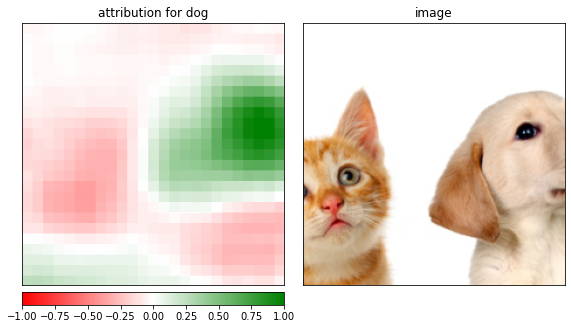

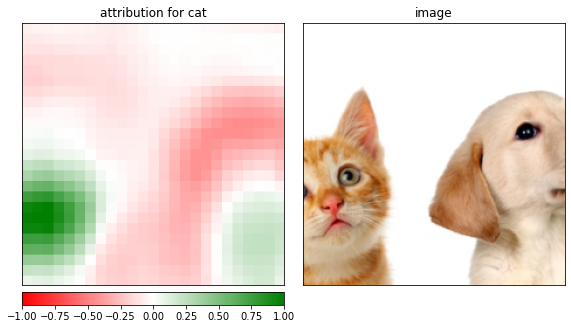

In [15]:
import numpy as np
from captum.attr import visualization as viz

attribution_dog = np.transpose(attribution_dog.squeeze().cpu().detach().numpy(), (1,2,0))


vis_types = ["heat_map", "original_image"]
vis_signs = ["all", "all"]

_ = viz.visualize_image_attr_multiple(attribution_dog,
                                     np.array(center_crop(img)),
                                     vis_types ,
                                     vis_signs,
                                     ["attribution for dog", "image"],
                                     show_colorbar  = True)


attribution_cat = np.transpose(attribution_cat.squeeze().cpu().detach().numpy(), (1,2,0))
_ = viz.visualize_image_attr_multiple(attribution_cat,
                                     np.array(center_crop(img)),
                                     vis_types ,
                                     vis_signs,
                                     ["attribution for cat", "image"],
                                     show_colorbar  = True)
